In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
a=1 
v=-3 # in units of E*
#v=10 # in units of E*
#v=0.5 # in units of E*
n = int(np.floor(np.sqrt(np.abs(v)))+1)
print("minimum n = ", n)
eta = np.sqrt(1+v/n**2)
print("eta =       ", eta)
k = n * pi / (2*a*eta)
print("k =         ", k)
print("eta*k =     ", eta*k)

minimum n =  2
eta =        0.5
k =          6.283185307179586
eta*k =      3.141592653589793


In [3]:
A=1
def psi_real(x):
    S = (-1)**n
    if (x<-a):
        return A*np.cos(k*(x+a))
    if (x>a):
        return S*A*np.cos(k*(x-a))    
    else:
        return A*np.cos(eta*k*(x+a))
    
def psi_imag(x):
    S = (-1)**n
    if (x<-a):
        return A*np.sin(k*(x+a))
    if (x>a):
        return S*A*np.sin(k*(x-a))   
    else:
        return A*np.sin(eta*k*(x+a))/eta
    
def psi_real_delta(x,delta):
    return psi_real(x)*cos(delta)-psi_imag(x)*sin(delta)

def psi_imag_delta(x,delta):
    return psi_imag(x)*cos(delta)+psi_real(x)*sin(delta)

def psi_magn_delta(x,delta):
    r = psi_real_delta(x,delta)
    i = psi_imag_delta(x,delta)
    return sqrt(r*r+i*i)

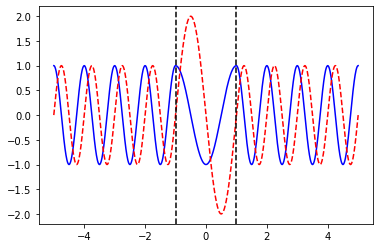

In [4]:
x = np.linspace(-5,5,1000)

rpsi = []
ipsi = []
for i in range(len(x)):
   rpsi.append(psi_real(x[i]))
   ipsi.append(psi_imag(x[i]))

plot(x,rpsi,"b-")
plot(x,ipsi,"r--")

plt.axvline(x=1,color='black',ls='--')
plt.axvline(x=-1,color='black',ls='--')

<IPython.core.display.Javascript object>


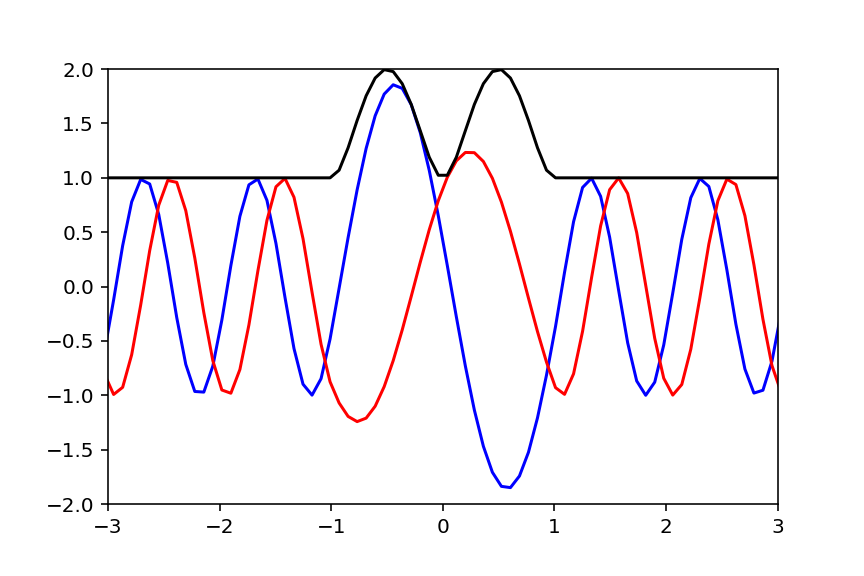

In [5]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers

x = np.linspace(-4,4,100)
plt . xlim (-3,3)
plt . ylim (-2,2)
la , = plt. plot ([], [], "b-")
lb , = plt. plot ([], [], "r-")
lc , = plt. plot ([], [], "k-")

def animate (i):
    delta = -2*pi*i/100
    rpsi = []
    ipsi = []
    mpsi = []
    for i in range(len(x)):
       rpsi.append(psi_real_delta(x[i],delta))
       ipsi.append(psi_imag_delta(x[i],delta))
       mpsi.append(psi_magn_delta(x[i],delta))
    la. set_data (x,rpsi)
    lb. set_data (x,ipsi)
    lc. set_data (x,mpsi)    
anim = FuncAnimation (plt .gcf () , animate , frames =100 , interval =20 , repeat = True )
plt.show()

# Set up formatting for the movie files
#Writer = writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Mulhearn'), bitrate=1800)
#anim.save('im.mp4', writer=writer)



<IPython.core.display.Javascript object>


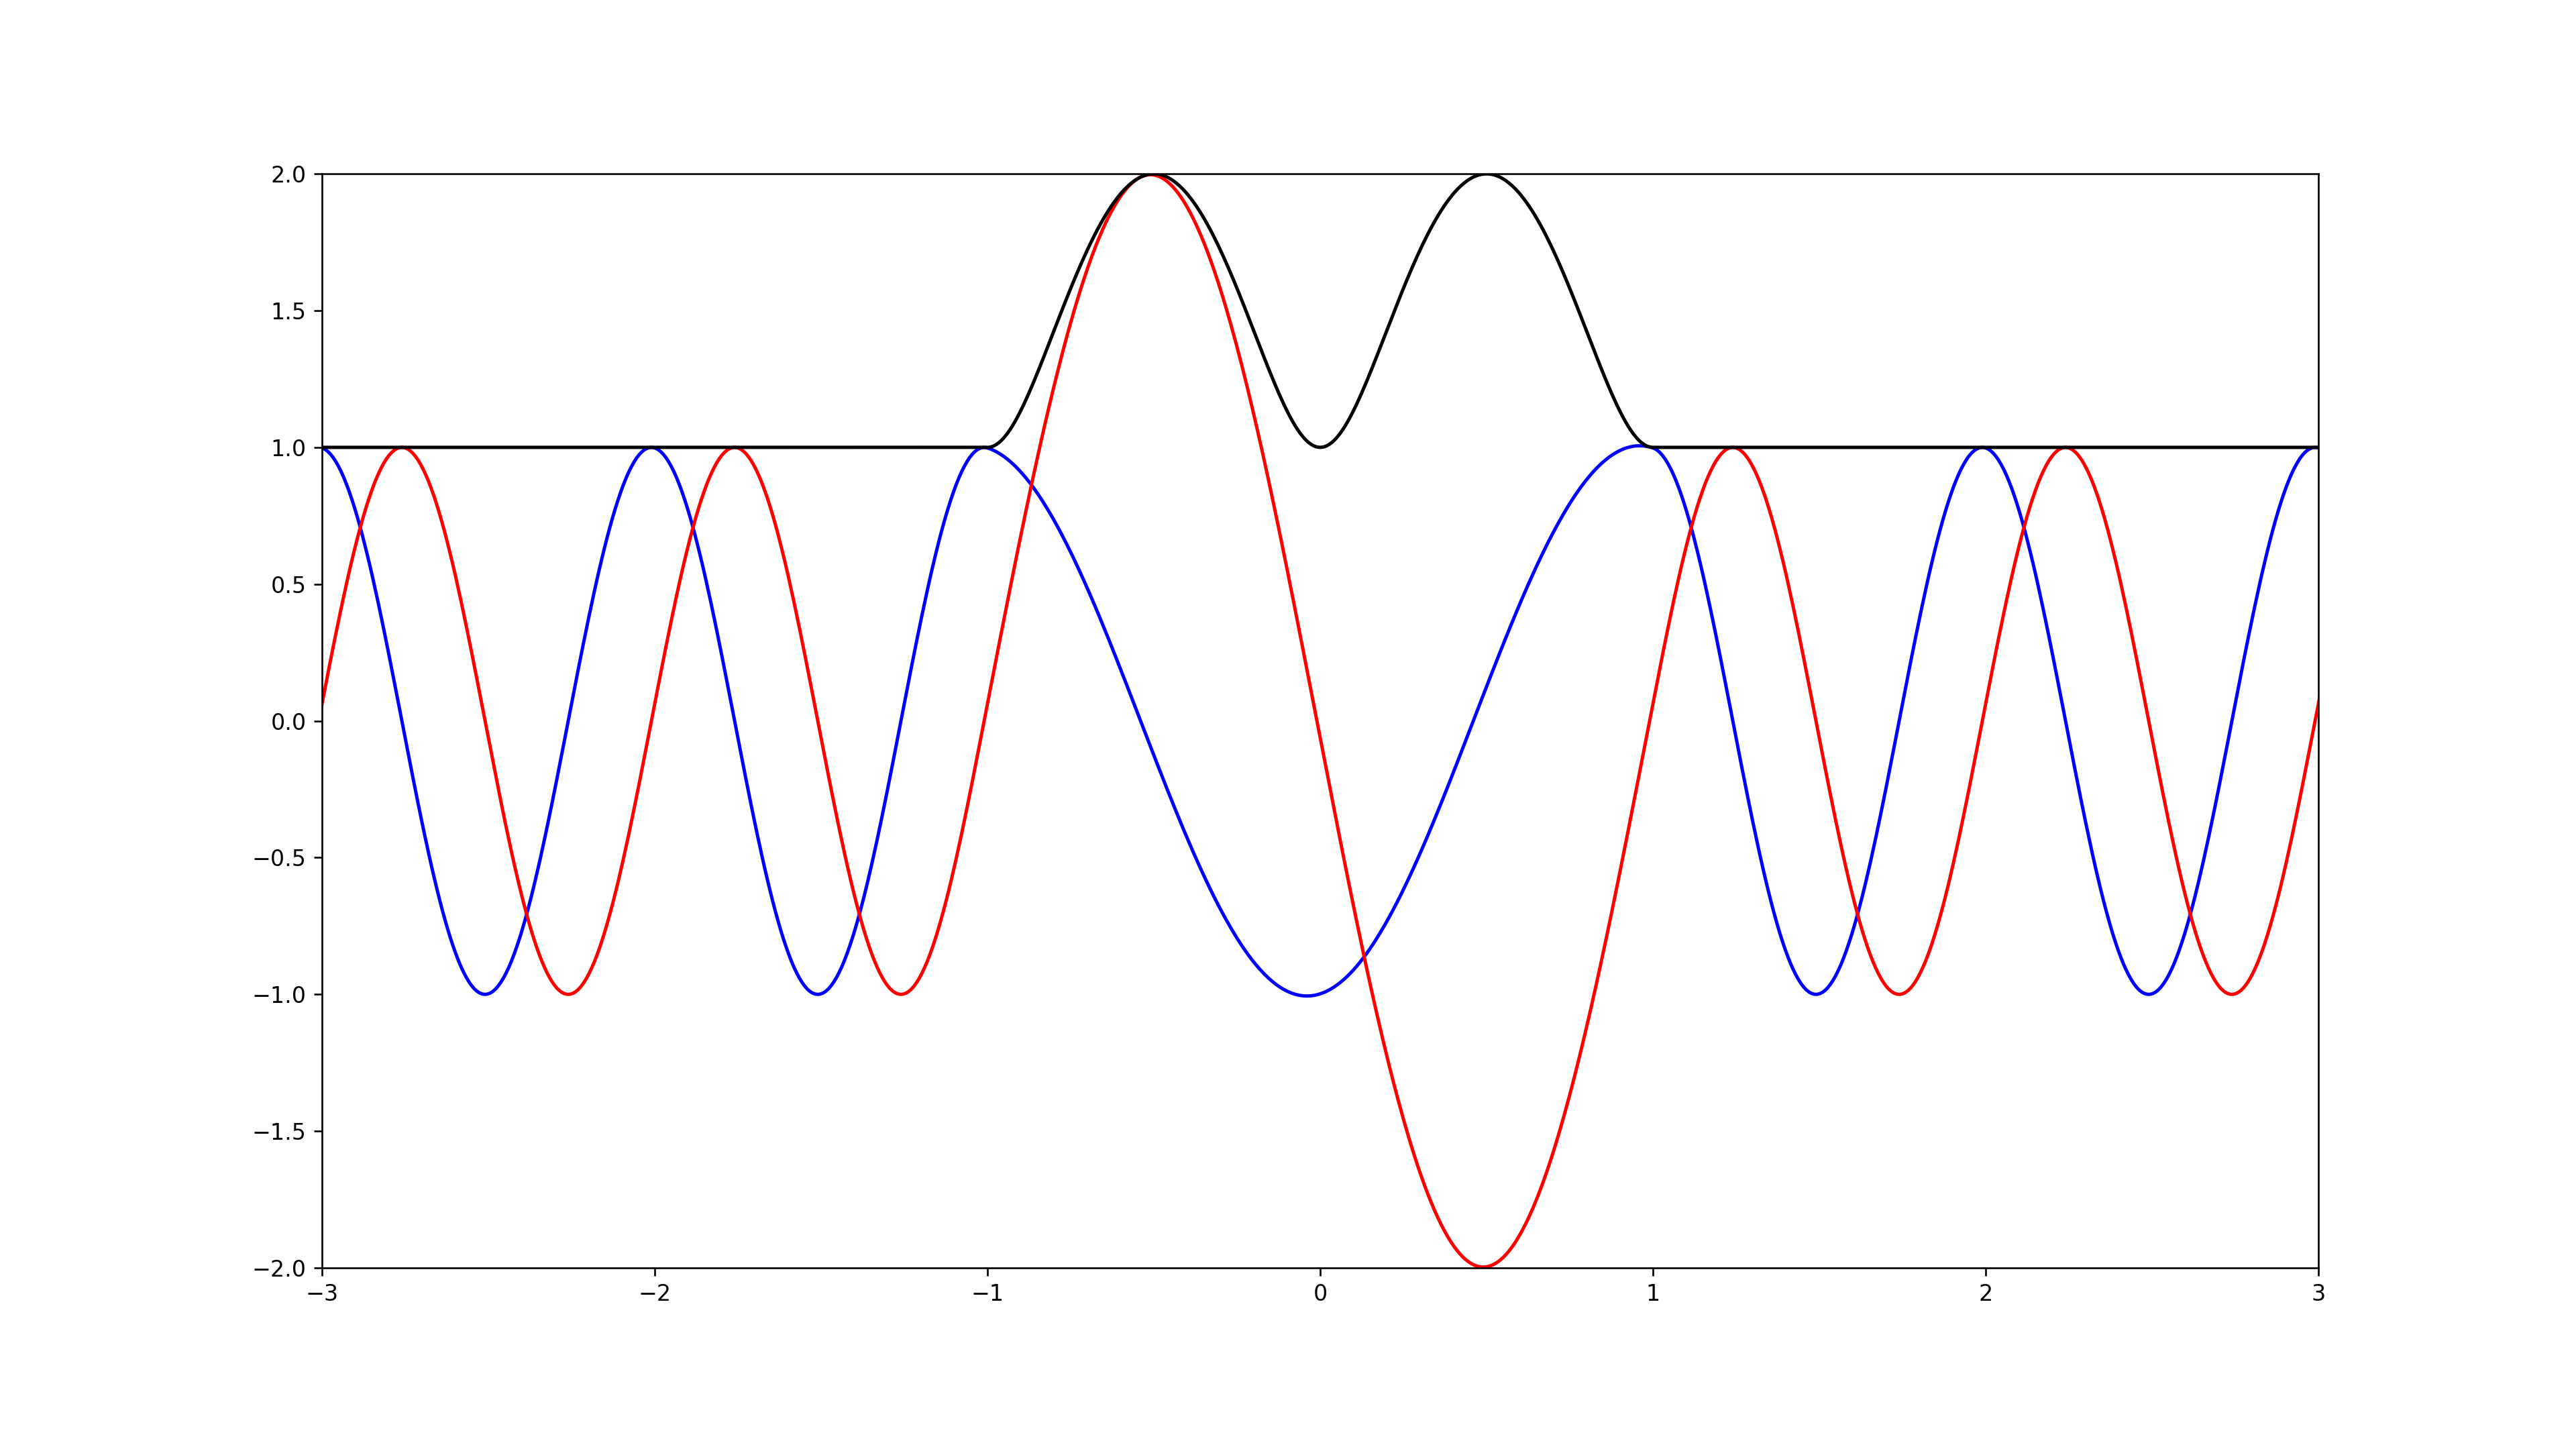

In [17]:

from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers

fig = plt.figure(figsize=(16, 9), dpi=(1920/16))
ax = plt.gca()  # Get current axes

x = np.linspace(-4,4,1000)
ax . set_xlim (-3,3)
ax . set_ylim (-2,2)
la , = ax. plot ([], [], "b-")
lb , = ax. plot ([], [], "r-")
lc , = ax. plot ([], [], "k-")

def animate (i):
    delta = -2*pi*i/100
    rpsi = []
    ipsi = []
    mpsi = []
    for i in range(len(x)):
       rpsi.append(psi_real_delta(x[i],delta))
       ipsi.append(psi_imag_delta(x[i],delta))
       mpsi.append(psi_magn_delta(x[i],delta))
    la. set_data (x,rpsi)
    lb. set_data (x,ipsi)
    lc. set_data (x,mpsi)    
anim = FuncAnimation (plt .gcf () , animate , frames =1000 , interval =20 , repeat = False )


# Set up formatting for the movie files
Writer = writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Mulhearn'), bitrate=1800)
anim.save('im.mp4', writer=writer)



In [ ]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers

x = np.linspace(-4,4,100)
ya = np.cos (x)
yb = np.sin (x)
plt . xlim (-4,4)
plt . ylim (-5,5)
la , = plt. plot ([], [], "b-")
lb , = plt. plot ([], [], "r-")
lc , = plt. plot ([], [], "k-")

def animate (i):
    delta = -2*pi*i/100
    rpsi = []
    ipsi = []
    mpsi = []
    for i in range(len(x)):
       rpsi.append(psi_real_delta(x[i],delta))
       ipsi.append(psi_imag_delta(x[i],delta))
       mpsi.append(psi_magn_delta(x[i],delta))
    la. set_data (x,rpsi)
    lb. set_data (x,ipsi)
    lc. set_data (x,mpsi)    
anim = FuncAnimation (plt .gcf () , animate , frames =100 , interval =20 , repeat = True )
plt.show()

# Set up formatting for the movie files
#Writer = writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Mulhearn'), bitrate=1800)
#anim.save('im.mp4', writer=writer)


In [ ]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

In [ ]:
%matplotlib notebook
from matplotlib . animation import FuncAnimation
x = np. linspace (0, 2 * np.pi , 100)
ya = np.cos (x)
yb = np.sin (x)
plt . xlim (0,2*np.pi)
plt . ylim (-1.5,1.5)
la , = plt. plot ([], [], "b-")
lb , = plt. plot ([], [], "r--")
def animate (i):
    la. set_data (x[:i],ya[:i])
    lb. set_data (x[:i],yb[:i])
anim = FuncAnimation (plt .gcf () , animate , frames =100 , interval =5 , repeat = True )
plt . show ()

In [ ]:
%matplotlib notebook
from matplotlib . animation import FuncAnimation
x = np. linspace (0, 2 * np.pi , 100)
ya = np.cos (x)
yb = np.sin (x)
plt . xlim (0,2*np.pi)
plt . ylim (-1.5,1.5)
la , = plt. plot ([], [], "b-")
lb , = plt. plot ([], [], "r-")
def animate (i):
    delta = 2*pi*i/100
    la. set_data (x,np.cos(x+delta))
    lb. set_data (x,np.sin(x+delta))
anim = FuncAnimation (plt .gcf () , animate , frames =100 , interval =10 , repeat = True )
plt . show ()

In [ ]:
print(matplotlib.animation.bitrate)